# Visualização Orçamento SME

In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
TOKEN = '198f959a5f39a1c441c7c863423264'

base_url = "https://gatewayapi.prodam.sp.gov.br:443/financas/orcamento/sof/v2.1.0"

headers = {'Authorization' : str('Bearer ' + TOKEN)}

# Carregando do arquivo

### Último ano

In [3]:
json_files = glob.glob("wget/2017/*")

frames = []

for f in json_files:
    e = json.load(open(f))
    e_df = pd.DataFrame(e['lstEmpenhos'])
    frames.append(e_df)
    
empenhos_df = pd.concat(frames)

### Todos anos

In [4]:
json_files = glob.glob("wget/*/*")

frames = []

for f in json_files:
    e = json.load(open(f))
    e_df = pd.DataFrame(e['lstEmpenhos'])
    frames.append(e_df)
    
empenhos_df_tot = pd.concat(frames)

# Outros cálculos

In [4]:
(empenhos_df.groupby(['txtDescricaoFonteRecurso', 'txtDescricaoUnidade'])['valTotalEmpenhado', 'valLiquidado'].sum().apply(lambda x: x / 1000000)
    #.sort_values(by=['valLiquidado'], ascending=False)
)

valTotalEmpenhado  \
txtDescricaoFonteRecurso         txtDescricaoUnidade                                                     
Fundo Constitucional da Educação Gabinete do Secretário                                    4440.279767   
Outras Fontes                    Gabinete do Secretário                                      33.979873   
Tesouro Municipal                Coordenadoria de Alimentação Escolar                        33.773687   
                                 Departamento de Alimentação Escolar                         73.222193   
                                 Diretoria Regional de Educação  Capela do Socorro          110.392806   
                                 Diretoria Regional de Educação - Butantã                   108.010822   
                                 Diretoria Regional de Educação - Campo Limpo               259.667430   
                                 Diretoria Regional de Educação - Capela do Socorro         117.796633   
                                 Diretoria Regional de Educação - Freguesia/Bras...         212.657771   
                                 Diretoria Regional de Educação - Guaianases                296.241506   
                                 Diretoria Regional de Educação - Ipiranga                  188.018721   
                                 Diretoria Regional de Educação - Itaquera                  207.890332   
                                 Diretoria Regional de Educação - Jaçanã/Tremembé           136.623102   
                                 Diretoria Regional de Educação - Penha                     174.380797   
                                 Diretoria Regional de Educação - Pirituba                  202.860499   
                                 Diretoria Regional de Educação - Santo Amaro               145.165674   
                                 Diretoria Regional de Educação - São Mateus                178.445242   
                                 Diretoria Regional de Educação - São Miguel                222.969903   
                                 Gabinete do Secretário                                    4865.537718   
Transferências Estaduais         Gabinete do Secretário                                      20.010323   
Transferências Federais          Coordenadoria de Alimentação Escolar                       131.144367   
                                 Departamento de Alimentação Escolar                        791.129915   
                                 Gabinete do Secretário                                      16.063592   

                                                                                     valLiquidado  
txtDescricaoFonteRecurso         txtDescricaoUnidade                                               
Fundo Constitucional da Educação Gabinete do Secretário                               3827.119838  
Outras Fontes                    Gabinete do Secretário                                 16.566437  
Tesouro Municipal                Coordenadoria de Alimentação Escolar                   21.330104  
                                 Departamento de Alimentação Escolar                    45.888672  
                                 Diretoria Regional de Educação  Capela do Socorro      94.119925  
                                 Diretoria Regional de Educação - Butantã               92.570389  
                                 Diretoria Regional de Educação - Campo Limpo          236.657658  
                                 Diretoria Regional de Educação - Capela do Socorro     96.161940  
                                 Diretoria Regional de Educação - Freguesia/Bras...    175.734458  
                                 Diretoria Regional de Educação - Guaianases           214.297709  
                                 Diretoria Regional de Educação - Ipiranga             176.640245  
                                 Diretoria Regional de Educação - Itaquera             172.945943  
                                 D

In [118]:
(empenhos_df.groupby(['anoEmpenho', 'txtDescricaoFonteRecurso'])['valTotalEmpenhado', 'valLiquidado'].sum().apply(lambda x: x / 1000000)
    .sort_values(by=['valLiquidado'], ascending=False))

valTotalEmpenhado  valLiquidado
anoEmpenho txtDescricaoFonteRecurso                                         
2017       Tesouro Municipal                       7533.654836   5788.261271
           Fundo Constitucional da Educação        4440.279767   3827.119838
           Transferências Federais                  938.337874    587.762549
           Outras Fontes                             33.979873     16.566437
           Transferências Estaduais                  20.010323     16.419021

In [119]:
empenhos_grupos_sum = empenhos_df.groupby('txtGrupoDespesa').agg({'valLiquidado': 'sum'})
total_empenhado = empenhos_grupos_sum.sum()
empenhos_grupos_sum['valLiquidado'].apply(lambda x: x / total_empenhado)

,valLiquidado
txtGrupoDespesa,
Investimentos,0.006200
Outras Despesas Correntes,0.430086
Pessoal e Encargos Sociais,0.563714


In [120]:
empenhos_grupos_sum = empenhos_df.groupby('txtDescricaoProjetoAtividade').agg({'valLiquidado': 'sum'})
total_empenhado = empenhos_grupos_sum.sum()
empenhos_grupos_sum['valLiquidado'].apply(lambda x: x / total_empenhado).sort_values(by=['valLiquidado'], ascending=False)

,valLiquidado
txtDescricaoProjetoAtividade,
Remuneração dos Profissionais do Magistério,0.373884
Operação e Manutenção do Sistema Municipal de Ensino,0.241750
Operação e Manutenção de CEIs e Creches da rede conveniada e outras mo,0.191350
Alimentação Escolar,0.046598
Administração da Unidade,0.037633
Operação e Manutenção dos Centros Educacionais Unificados,0.029368
Transporte Escolar,0.019011
Fornecimento de Uniformes e Material Escolar,0.011987
Programa Nacional de Alimentação Escolar - PNAE/ FNDE,0.011572


### Orçamento total ao longo dos anos

In [122]:
(empenhos_df_tot.groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado'].sum().apply(lambda x: x / 1000000))

,valTotalEmpenhado,valLiquidado
anoEmpenho,,
2006,3472.825998,2894.670161
2007,4221.718517,3508.820950
2008,4794.790886,4151.135010
2009,5432.659446,4519.678463
2010,6436.356352,5330.202603
2011,7268.388309,6210.633614
2012,7798.446850,6997.170627
2013,8666.002712,7595.840440
2014,9220.071936,8417.624102


In [123]:
d = (empenhos_df_tot.groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado'].sum()
     .apply(lambda x: x / 1000000000))
d = pd.merge(d, inflacao_df, how='left', left_index=True, right_on='ano')
d['valTotalEmpenhadoCor'] = round(d.valTotalEmpenhado * d.indice, 1)
d['valLiquidadoCor'] = round(d.valLiquidado * d.indice, 1)
export = d[['ano', 'valTotalEmpenhadoCor', 'valLiquidadoCor']]
export = export.rename(columns={'ano': 'Ano', 'valTotalEmpenhadoCor': 'Orçado', 'valLiquidadoCor': 'Liquidado'})
export.to_csv('exports/serie-historica.csv', index=False, decimal=',')
export

,Ano,Orçado,Liquidado
0,2006,6.6,5.5
1,2007,7.5,6.3
2,2008,7.7,6.6
3,2009,8.8,7.3
4,2010,9.5,7.8
5,2011,10.1,8.6
6,2012,10.1,9.1
7,2013,10.7,9.3
8,2014,10.9,10.0
9,2015,11.1,9.9


## Leve-Leite

In [126]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False)]
    .codProjetoAtividade.unique())

array(['2873'], dtype=object)

In [127]:
empenhos_df[(empenhos_df['codProjetoAtividade'] == '2823')
           |
        (empenhos_df['codProjetoAtividade'] == '2873')
           ].txtDescricaoItemDespesa.unique()

array(['Leite e Achocolatados', 'Transporte e Remessa de Encomendas'],
      dtype=object)

In [128]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False)]
    .txtDescricaoItemDespesa.unique())

array(['Leite e Achocolatados', 'Transporte e Remessa de Encomendas'],
      dtype=object)

In [129]:
leve_leite = empenhos_df_tot[empenhos_df_tot['txtDescricaoProjetoAtividade'].str.contains('leite', case=False)]
(leve_leite.groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado'].sum().apply(lambda x: x / 1000000))

,valTotalEmpenhado,valLiquidado
anoEmpenho,,
2009,170.198708,100.141138
2010,313.459163,173.080907
2011,283.406510,137.581070
2012,225.811425,148.240423
2013,206.624016,176.932125
2014,293.480973,261.176066
2015,436.453270,256.232757
2016,379.857965,246.448074
2017,79.562042,50.826933


### Construção de CEIs

In [67]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('constru', case=False)]
    .txtDescricaoProjetoAtividade.unique())

array(['Construção de  Escolas Municipais de Educação Infantil - EMEI',
       'Construção de Centros de Educação Infantil - CEI',
       'Construção, reforma e ampliação de equipamentos educacionais'],
      dtype=object)

In [142]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('- cei', case=False)]
    .txtDescricaoProjetoAtividade.unique())

array(['Reforma e Ampliação de Centros de Educação Infantil - CEI',
       'Construção de Centros de Educação Infantil  - CEI',
       'Remuneração dos Profissionais do Magistério - CEI',
       'Construção de Centros de Educação Infantil - CEI',
       'E2955 - CEI Regina Angelorum, CNPJ 47.858.550/0001-00, Rua José Bernad',
       'E2947 - CEI Maria da Glória Baumgart, Rua Amazonas da Silva, 538 - Vil',
       'E2946 - CEI Augusta Cordeiro da Rocha, Rua Dr. Marrei Junior, 203 - Pa',
       'E2945 - CEI Gigi Tomazelli Wiazowski, Rua Hidrolândia, 114 - Tucuruvi '], dtype=object)

In [146]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('Reforma e Ampliação de Centros de Educação Infantil - CEI', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('Construção de Centros de Educação Infantil', case=False))
]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

,valTotalEmpenhado,valLiquidado
anoEmpenho,,
2010,22.319672,9.221597
2011,90.520025,23.600975
2012,120.034527,91.333036
2013,137.647177,64.381027
2014,125.913686,82.997972
2015,233.083731,113.583956
2016,59.553879,39.207980
2017,75.645724,45.401582


## Convênios

In [147]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('conv', case=False)]
    .txtDescricaoProjetoAtividade.unique())

array(['Convênios para Operação e Manutenção de CEIs e Creches',
       'Convênios p/ Atend.  Crianças e Adolesc. c/ necessid. Educ. Especiais',
       'Convênios para Atendimento de Crianças e Adolescentes com necessidades',
       'Operação e Manutenção de CEIs e Creches da rede conveniada e outras mo'], dtype=object)

In [155]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('Convênios para Operação e Manutenção de CEIs e Creches', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('Operação e Manutenção de CEIs e Creches da rede conveniada e outras mo', case=False))
]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

,valTotalEmpenhado,valLiquidado
anoEmpenho,,
2010,604.005414,514.416815
2011,766.892416,682.355016
2012,932.693317,856.667834
2013,1175.597765,994.606916
2014,1307.848539,1165.432993
2015,1645.718912,1415.341711
2016,2025.399664,1742.691660
2017,2233.664771,1958.681495


## Transporte Escolar

In [65]:
teg = (empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.lower().str.contains('transporte')])
teg.txtDescricaoItemDespesa.unique()

array(['Transporte Escolar - EMEF', 'Veículos',
       'Outros Serviços de Terceiros - Pessoa Física',
       'Transporte Escolar - EMEE', 'INSS / Contribuinte Individual ',
       'Outros Serviços de Terceiros - Pessoa Jurídica - Tributável',
       'Transporte Escolar - EMEI',
       'Pequenas Reformas - Centros Esportivos e Similares',
       'Serviço com a População de Rua'], dtype=object)

In [67]:
teg.describe()

,anoEmpenho,codCategoria,codEmpenho,codGrupo,codModalidade,mesEmpenho,numReserva,valAnuladoEmpenho,valEmpenhadoLiquido,valLiquidado,valPagoExercicio,valPagoRestos,valTotalEmpenhado
count,23826.0,23826.0,23826.000000,23826.0,23826.0,23826.0,23826.000000,2.382600e+04,2.382600e+04,2.382600e+04,2.382600e+04,23826.000000,2.382600e+04
mean,2017.0,3.0,70236.326870,3.0,90.0,12.0,38724.432259,8.734656e+02,8.906372e+03,8.167349e+03,8.164746e+03,696.173122,9.779837e+03
std,0.0,0.0,32203.971614,0.0,0.0,0.0,19543.573476,9.894154e+03,1.864607e+04,1.740179e+04,1.740221e+04,4184.615897,2.121153e+04
min,2017.0,3.0,17558.000000,3.0,90.0,12.0,13156.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000e-02
25%,2017.0,3.0,41017.250000,3.0,90.0,12.0,13158.000000,0.000000e+00,3.696420e+03,3.520400e+03,3.520400e+03,0.000000,4.268750e+03
50%,2017.0,3.0,69624.000000,3.0,90.0,12.0,38852.000000,0.000000e+00,6.401905e+03,6.160700e+03,6.160700e+03,0.000000,6.700490e+03
75%,2017.0,3.0,98671.750000,3.0,90.0,12.0,53567.000000,0.000000e+00,9.501718e+03,8.708250e+03,8.708250e+03,0.000000,1.000000e+04
max,2017.0,3.0,124821.000000,3.0,90.0,12.0,65431.000000,1.360216e+06,1.360216e+06,1.360216e+06,1.360216e+06,366828.940000,1.368000e+06


In [68]:
len(teg
    .numCpfCnpj.unique())

1982

### `TR.01` Transporte Escolar - Evolução Gastos

In [163]:
# usar com dados de todos os anos
d = (empenhos_df_tot[empenhos_df_tot['txtDescricaoProjetoAtividade'].str.lower().str.contains('transporte')]
 .groupby('anoEmpenho')['valLiquidado']
 .sum().apply(lambda x: round(x / 1000000, 1)))

In [166]:
d = (empenhos_df_tot[empenhos_df_tot['txtDescricaoProjetoAtividade'].str.lower().str.contains('transporte')]
     .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
     .sum().apply(lambda x: round(x / 1000000, 1)))
d = pd.merge(d, inflacao_df, how='left', left_index=True, right_on='ano')
d['valTotalEmpenhadoCor'] = round(d.valTotalEmpenhado * d.indice, 1)
d['valLiquidadoCor'] = round(d.valLiquidado * d.indice, 1)
export = d[['ano', 'valLiquidadoCor']]
export = export.rename(columns={'valLiquidadoCor':'Liquidado', 'ano': 'Ano'})
export.to_csv('exports/tr-01.csv', decimal=',', index=False)
export

,Ano,Liquidado
0,2006,156.7
1,2007,144.2
2,2008,124.8
3,2009,169.5
4,2010,159.3
5,2011,154.4
6,2012,152.9
7,2013,153.5
8,2014,159.7
9,2015,156.2


In [73]:
d = (teg
 .groupby('txtDescricaoFonteRecurso')['valLiquidado']
 .sum().apply(lambda x: x / 1000000))
# d.to_csv('exports/tr-02.csv')
d

txtDescricaoFonteRecurso
Tesouro Municipal    194.595252
Name: valLiquidado, dtype: float64

In [75]:
groupSum(teg)

,valTotalEmpenhado,valLiquidado
txtCategoriaEconomica,,
Despesas Correntes,233.014406,194.595252


,valTotalEmpenhado,valLiquidado
txtDescricaoElemento,,
Outros Serviços de Terceiros - Pessoa Física,123.252825,103.753417
Outros Serviços de Terceiros -Pessoa Jurídica,103.894366,86.712105
Obrigações Tributárias e Contributivas,5.515257,3.788212
Despesas de Exercícios Anteriores,0.351958,0.341519


,valTotalEmpenhado,valLiquidado
txtDescricaoFonteRecurso,,
Tesouro Municipal,233.014406,194.595252


,valTotalEmpenhado,valLiquidado
txtDescricaoItemDespesa,,
Transporte Escolar - EMEF,226.955018,190.285810
INSS / Contribuinte Individual,5.515257,3.788212
Outros Serviços de Terceiros - Pessoa Jurídica - Tributável,0.276233,0.273998
Pequenas Reformas - Centros Esportivos e Similares,0.112273,0.103859
Outros Serviços de Terceiros - Pessoa Física,0.075726,0.067521
Transporte Escolar - EMEI,0.065014,0.065014
Serviço com a População de Rua,0.007867,0.007867
Transporte Escolar - EMEE,0.002972,0.002972
Veículos,0.004048,0.000000


,valTotalEmpenhado,valLiquidado
txtDescricaoPrograma,,
Melhoria da qualidade e ampliação do acesso à educação,233.014406,194.595252


,valTotalEmpenhado,valLiquidado
txtDescricaoProjetoAtividade,,
Transporte Escolar,233.014406,194.595252


,valTotalEmpenhado,valLiquidado
txtDescricaoSubElemento,,
Locação de Móveis e Intangíveis,123.252825,103.753417
Serviços de Creches e Assistência Pré-Escolar,103.774226,86.600379
Contribuições Previdenciárias - Serviços de Terceiros,5.515257,3.788212
Serviços de Terceiros - Pessoa Jurídica,0.276233,0.273998
Manutenção e Conservação de Bens Imóveis,0.112273,0.103859
Serviços de Terceiros - Pessoa Física,0.075726,0.067521
Serviços de Assistência Social,0.007867,0.007867


,valTotalEmpenhado,valLiquidado
txtDescricaoSubFuncao,,
Educação Básica,233.014406,194.595252


,valTotalEmpenhado,valLiquidado
txtDescricaoUnidade,,
Gabinete do Secretário,233.014406,194.595252


,valTotalEmpenhado,valLiquidado
txtGrupoDespesa,,
Outras Despesas Correntes,233.014406,194.595252


,valTotalEmpenhado,valLiquidado
txtModalidadeAplicacao,,
Aplicações Diretas,233.014406,194.595252


,valTotalEmpenhado,valLiquidado
txtRazaoSocial,,
COOPERATIVA BRASILEIRA DE TRANSPORTE COBRATE,7.420587,6.290727
"COOPER- X - COOP SERV TRANSPORTAD AUT PAS, ESCOLARES E MON DO EST SP",6.522607,5.387077
INSTITUTO NACIONAL DO SEGURO SOCIAL,5.515257,3.788212
P R SELIS TRANSPORTES EIRELI - EPP,2.994445,2.366641
COOPER DE TRAB. DOS C. A.T.P NA REP. FED.DO.BR COOPERUNIÃO BRASILEIRA,2.403070,2.084142
COOPERATIVA DE TRANSPORTE ESCOLAR DE CONDUTOR E MONITOR - COOTRECM,2.205080,1.903273
BELLA TRANSPORTES LTDA - ME,1.472303,1.322393
JULIEDRY TRANSPORTES LTDA -ME,1.518641,1.299755
VIA LUZ TRANSPORTES DE PASSAGEIROS LTDA,1.381945,1.258995


## Alimentação
(confiabilidade difícil pois em alguns anos inclui o Leve-Leite e em outros não)

In [21]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    &
    (~empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
    .txtDescricaoProjetoAtividade.unique())

array(['Alimentação Escolar',
       'Programa Nacional de Alimentação Escolar - PNAE/ FNDE'],
      dtype=object)

In [14]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
    .txtDescricaoSubFuncao.unique())

array(['Alimentação e Nutrição'], dtype=object)

In [34]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

,valTotalEmpenhado,valLiquidado
anoEmpenho,,
2017,946.800345,595.436596


In [44]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    &
    (~empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

,valTotalEmpenhado,valLiquidado
anoEmpenho,,
2017,946.800345,595.436596


In [143]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

,valTotalEmpenhado,valLiquidado
anoEmpenho,,
2017,1026.362386,646.263529


In [46]:
alimentacao = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
])
groupSum(alimentacao)

,valTotalEmpenhado,valLiquidado
txtCategoriaEconomica,,
Despesas Correntes,1026.362386,646.263529


,valTotalEmpenhado,valLiquidado
txtDescricaoElemento,,
Outros Serviços de Terceiros -Pessoa Jurídica,700.795726,392.613835
Material de Consumo,258.694712,194.498042
"Material, Bem ou Serviço para Distribuição Gratuita",42.994545,39.280542
Contribuições,23.877403,19.871110


,valTotalEmpenhado,valLiquidado
txtDescricaoFonteRecurso,,
Transferências Federais,922.274282,581.286497
Tesouro Municipal,104.088104,64.977033


,valTotalEmpenhado,valLiquidado
txtDescricaoItemDespesa,,
Refeições Prontas,593.326962,328.161845
Diversos Gêneros Alimentícios,159.069208,118.266813
Leite e Achocolatados,42.994545,39.280542
Preparo e Distribuição de Alimentos,33.367069,29.668550
Carnes em Geral,30.159054,23.368220
Armazenagem de Alimentos,37.534199,23.237049
"Outras Instituições de Caráter Assistencial, Cultural ou Educacional",23.877403,19.871110
Laticínios em Geral,15.931271,15.732020
"Pães, Doces, Biscoitos e Salgados",20.711276,15.177323


,valTotalEmpenhado,valLiquidado
txtDescricaoPrograma,,
Melhoria da qualidade e ampliação do acesso à educação,1026.362386,646.263529


,valTotalEmpenhado,valLiquidado
txtDescricaoProjetoAtividade,,
Alimentação Escolar,782.432983,476.980195
Programa Nacional de Alimentação Escolar - PNAE/ FNDE,164.367361,118.456401
Leve-Leite,79.562042,50.826933


,valTotalEmpenhado,valLiquidado
txtDescricaoSubElemento,,
Fornecimento de Alimentação,593.326962,328.161845
Gêneros de Alimentação,258.694712,194.498042
Mercadorias para Doação,42.994545,39.280542
Outros Serviços de Terceiros - Pessoa Jurídica,33.367069,29.668550
Armazenagem,37.534199,23.237049
"Instituições de Caráter Assistencial, Cultural e Educacional",23.877403,19.871110
Fretes e Transporte de Encomendas,36.567497,11.546391


,valTotalEmpenhado,valLiquidado
txtDescricaoSubFuncao,,
Alimentação e Nutrição,1026.362386,646.263529


,valTotalEmpenhado,valLiquidado
txtDescricaoUnidade,,
Departamento de Alimentação Escolar,862.147511,553.323166
Coordenadoria de Alimentação Escolar,164.214876,92.940363


,valTotalEmpenhado,valLiquidado
txtGrupoDespesa,,
Outras Despesas Correntes,1026.362386,646.263529


,valTotalEmpenhado,valLiquidado
txtModalidadeAplicacao,,
Aplicações Diretas,1002.484983,626.392419
Transferências a Instituições Privadas sem Fins Lucrativos,23.877403,19.871110


,valTotalEmpenhado,valLiquidado
txtRazaoSocial,,
SHA COMERCIO DE ALIMENTOS LTDA,190.741737,118.178282
DENJUD REFEIÇÕES COLETIVAS ADMINISTRAÇÃO E SERVIÇOS LTDA,144.606175,77.517622
COMERCIAL MILANO BRASIL LTDA,92.039220,74.653773
APETECE SISTEMAS DE ALIMENTACAO S/A,161.392758,73.424133
TANGARÁ IMP.E EXP.S/A,61.845260,55.286151
BASE SISTEMA SERVIÇOS DE ADMINISTRAÇÃO E COMERCIO LTDA,65.781097,40.209289
P.R.M. SERVIÇOS E MAO DE OBRA ESPECIALIZADA EIRELI,44.011233,34.421740
SERBOM ARMAZENS GERAIS FRIGORIFICOS LTDA,37.534199,23.237049
CASTOR ALIMENTOS LTDA,22.742754,19.027426


### `AL.1` Alimentação - Itens Despesa

In [138]:
d = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
 .groupby('txtDescricaoItemDespesa')['valLiquidado']
 .sum().apply(lambda x: round(x / 1000000,1)).sort_values(ascending=False))
# d.to_csv('exports/al-01.csv')
d

txtDescricaoItemDespesa
Refeições Prontas                                                         328.2
Diversos Gêneros Alimentícios                                             118.3
Leite e Achocolatados                                                      39.3
Preparo e Distribuição de Alimentos                                        29.7
Carnes em Geral                                                            23.4
Armazenagem de Alimentos                                                   23.2
Outras Instituições de Caráter Assistencial, Cultural ou Educacional       19.9
Laticínios em Geral                                                        15.7
Pães, Doces, Biscoitos e Salgados                                          15.2
Transporte e Remessa de Encomendas                                         11.5
Grãos em Geral                                                              9.7
Frutas Naturais                                                             4.8
Leite em Pó ou N

[nltk_data] Downloading package stopwords to /home/bpl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


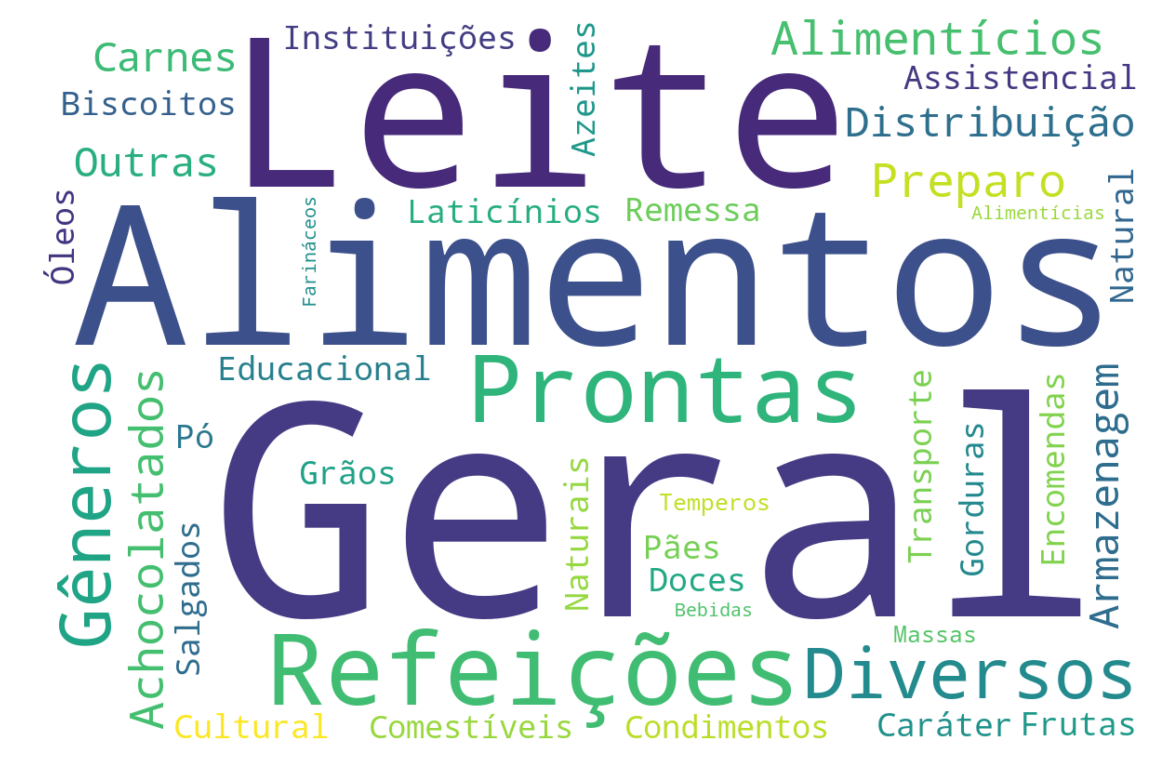

In [152]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

# Create a list of word
# text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
d_df = pd.DataFrame(d)
text = ' '.join(d_df.index)
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=20,
    stopwords=stopwords,
    colormap='viridis',
#     mode='RGBA',
#     background_color='rgba(255, 255, 255, 0)'
    background_color='#fff'
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

[nltk_data] Downloading package stopwords to /home/bpl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


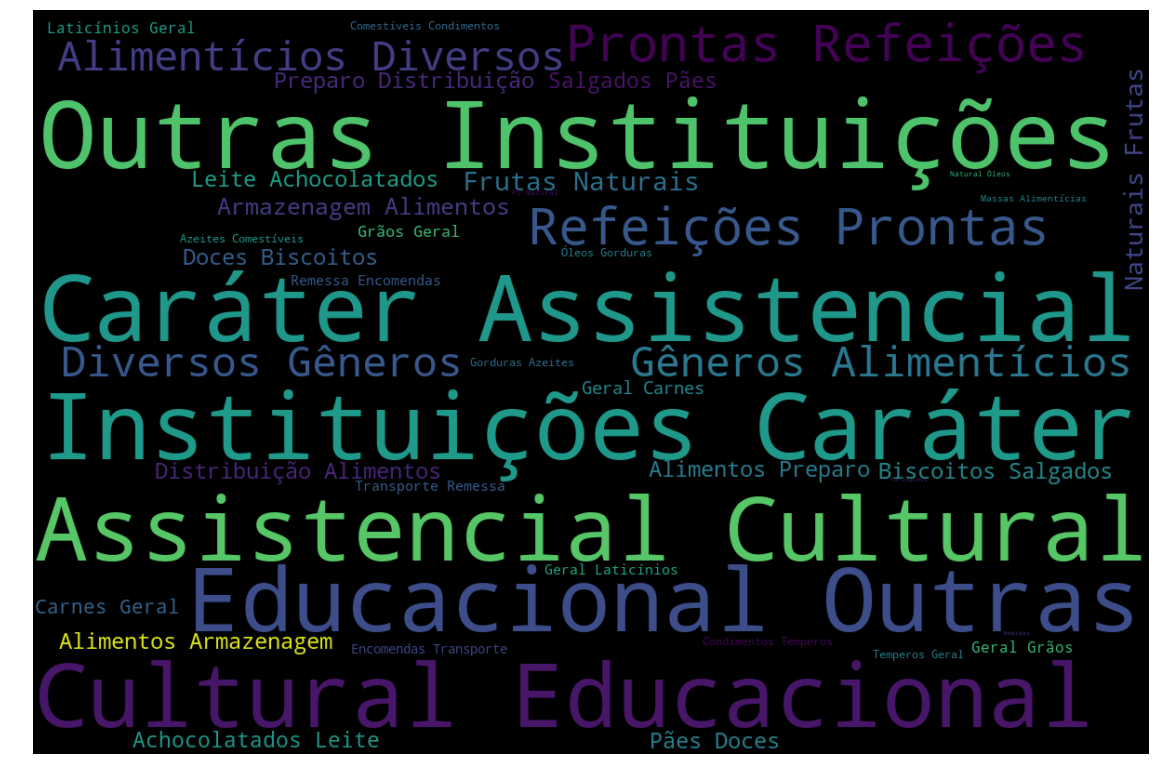

In [113]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

# Create a list of word
# text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
d_df = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
])
text = ' '.join(d_df.txtDescricaoItemDespesa)
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=0,
    stopwords=stopwords
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Wordcloud para todos itens de despesa

[nltk_data] Downloading package stopwords to /home/bpl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


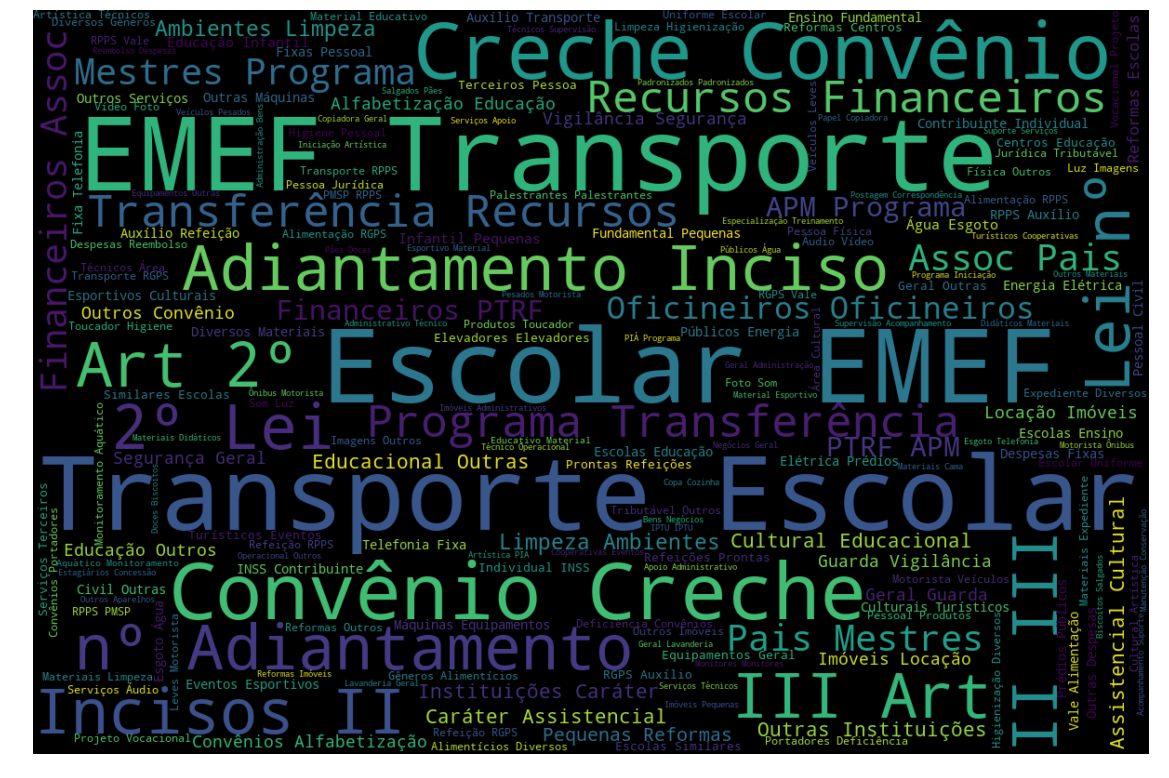

In [102]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

text = ' '.join(empenhos_df['txtDescricaoItemDespesa'])
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=0,
    stopwords=stopwords
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

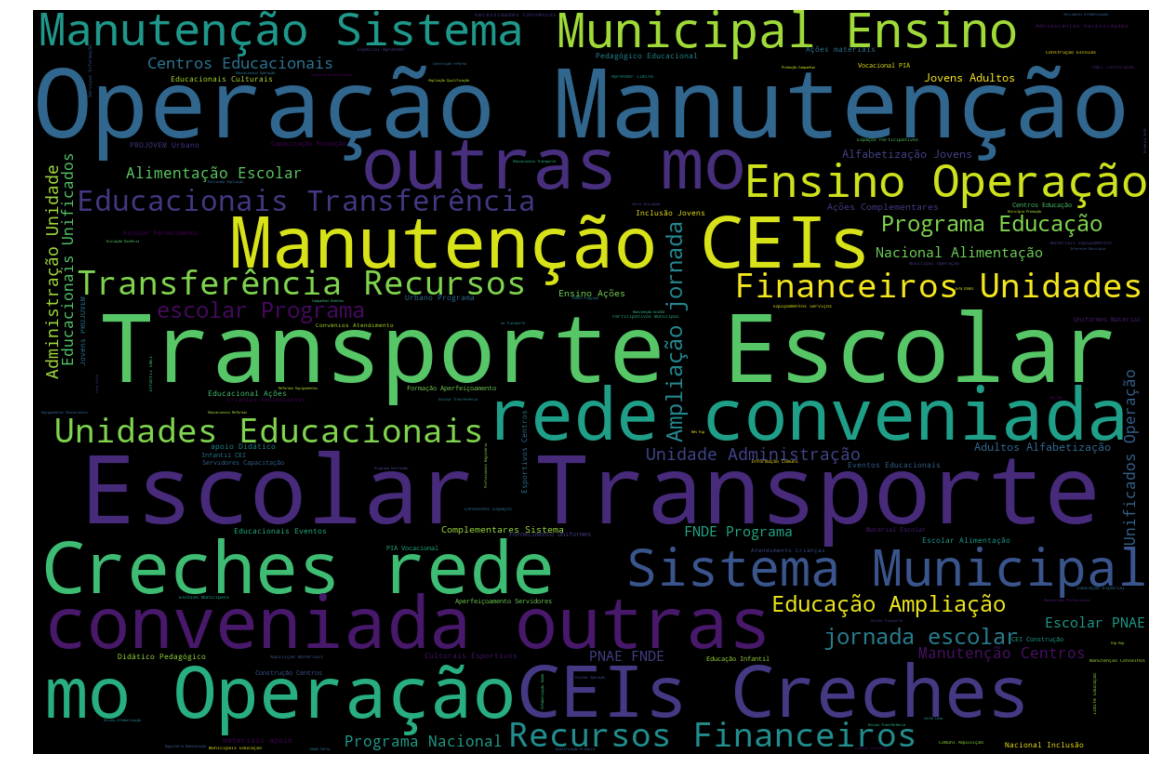

In [101]:
text = ' '.join(empenhos_df['txtDescricaoProjetoAtividade'])
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=0,
    stopwords=stopwords
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

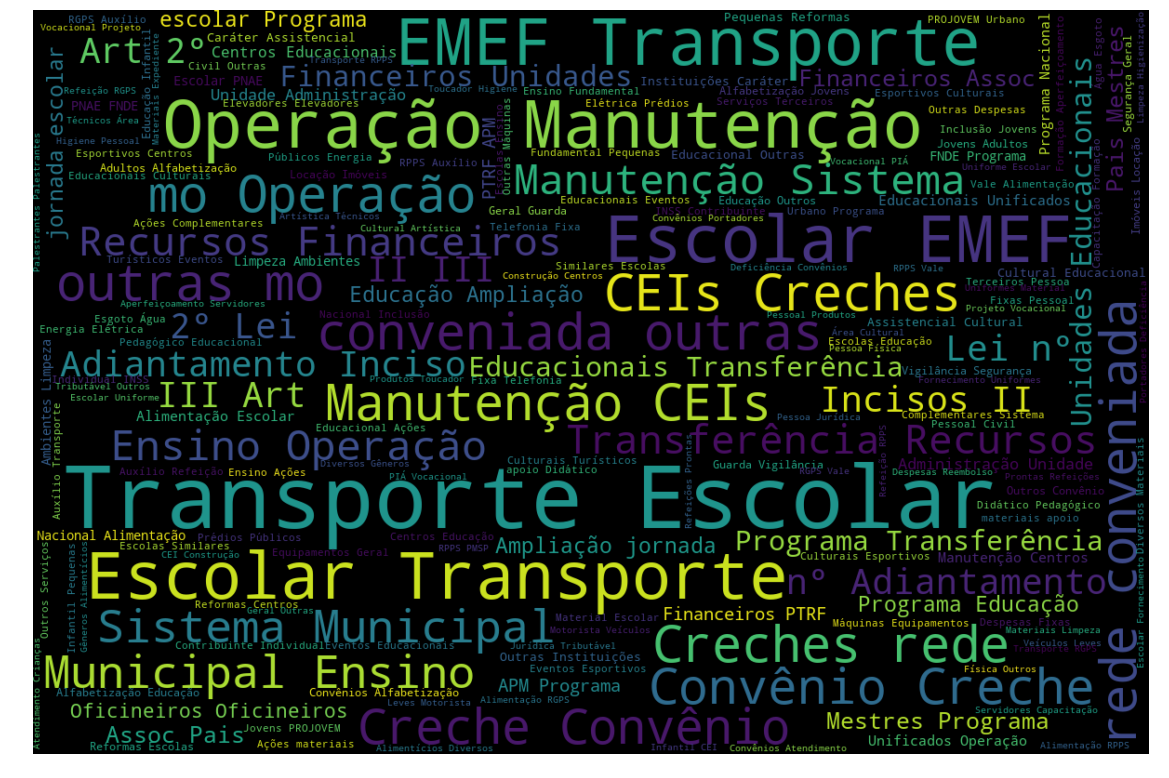

In [100]:
text = ' '.join(empenhos_df['txtDescricaoProjetoAtividade'])
text += ' '.join(empenhos_df['txtDescricaoItemDespesa'])
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=0,
    stopwords=stopwords
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### `AL.2` Alimentação - Fonte dos Recursos

In [154]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
 .groupby(['txtDescricaoFonteRecurso', 'txtDescricaoProjetoAtividade'])['valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values(ascending=False))

txtDescricaoFonteRecurso  txtDescricaoProjetoAtividade                         
Transferências Federais   Alimentação Escolar                                      462.830096
                          Programa Nacional de Alimentação Escolar - PNAE/ FNDE    118.456401
Tesouro Municipal         Leve-Leite                                                50.826933
                          Alimentação Escolar                                       14.150100
Name: valLiquidado, dtype: float64

In [155]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
 .groupby(['txtDescricaoProjetoAtividade'])['valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values(ascending=False))

txtDescricaoProjetoAtividade
Alimentação Escolar                                      476.980195
Programa Nacional de Alimentação Escolar - PNAE/ FNDE    118.456401
Leve-Leite                                                50.826933
Name: valLiquidado, dtype: float64

In [131]:
(empenhos_df
 .groupby('txtDescricaoFonteRecurso')['valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values(ascending=False))

txtDescricaoFonteRecurso
Tesouro Municipal                   5788.261271
Fundo Constitucional da Educação    3827.119838
Transferências Federais              587.762549
Outras Fontes                         16.566437
Transferências Estaduais              16.419021
Name: valLiquidado, dtype: float64

In [135]:
tot = empenhos_df['valLiquidado'].sum()
(empenhos_df
 .groupby('txtDescricaoFonteRecurso')['valLiquidado']
 .sum().apply(lambda x: round((x / tot) * 100, 2)).sort_values(ascending=False))

txtDescricaoFonteRecurso
Tesouro Municipal                   56.55
Fundo Constitucional da Educação    37.39
Transferências Federais              5.74
Transferências Estaduais             0.16
Outras Fontes                        0.16
Name: valLiquidado, dtype: float64

## Educação especial

In [20]:
ed_especial = (empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.lower().str.contains('especial')])
ed_especial.txtDescricaoProjetoAtividade.unique()

array(['Educação Especial - Aprender sem limite'], dtype=object)

In [21]:
ed_especial = (empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.lower().str.contains('especial')])
ed_especial.txtDescricaoItemDespesa.unique()

array(['Concessão de Bolsa-Auxílio para Estagiários',
       'Convênios - Alfabetização, Educação e Outros',
       'Concessão de auxílio-transporte a estagiários',
       'Técnicos na Área Cultural e Artística',
       'Jornalistas e Outros Profissionais de Comunicação',
       'Cursos de Especialização e Treinamento',
       'Tradução ou Interpretação Comercial',
       'Supervisão, Acompanhamento e Suporte de Serviços Técnicos',
       'Taxa de Administração - Estagiário',
       'INSS / Contribuinte Individual '], dtype=object)

In [52]:
(ed_especial
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

,valTotalEmpenhado,valLiquidado
anoEmpenho,,
2017,56.401749,48.269271


In [54]:
groupSum(ed_especial)

,valTotalEmpenhado,valLiquidado
txtCategoriaEconomica,,
Despesas Correntes,56.401749,48.269271


,valTotalEmpenhado,valLiquidado
txtDescricaoElemento,,
Outros Serviços de Terceiros - Pessoa Jurídica,51.516665,44.565898
Outros Auxílios Financeiros a Pessoas Físicas,4.485520,3.355589
Outros Serviços de Terceiros -Pessoa Jurídica,0.387418,0.339620
Outros Serviços de Terceiros - Pessoa Física,0.004928,0.004389
Obrigações Tributárias e Contributivas,0.007218,0.003774


,valTotalEmpenhado,valLiquidado
txtDescricaoFonteRecurso,,
Tesouro Municipal,56.401749,48.269271


,valTotalEmpenhado,valLiquidado
txtDescricaoItemDespesa,,
"Convênios - Alfabetização, Educação e Outros",32.364774,28.047264
Concessão de Bolsa-Auxílio para Estagiários,19.151891,16.518633
Concessão de auxílio-transporte a estagiários,4.485520,3.355589
Taxa de Administração - Estagiário,0.343528,0.295730
Cursos de Especialização e Treinamento,0.027890,0.027890
"Supervisão, Acompanhamento e Suporte de Serviços Técnicos",0.008200,0.008200
Tradução ou Interpretação Comercial,0.007800,0.007800
Jornalistas e Outros Profissionais de Comunicação,0.004389,0.004389
INSS / Contribuinte Individual,0.007218,0.003774


,valTotalEmpenhado,valLiquidado
txtDescricaoPrograma,,
Direitos da pessoa com deficiência,56.401749,48.269271


,valTotalEmpenhado,valLiquidado
txtDescricaoProjetoAtividade,,
Educação Especial - Aprender sem limite,56.401749,48.269271


,valTotalEmpenhado,valLiquidado
txtDescricaoSubElemento,,
Serviços de Apoio ao Ensino,32.364774,28.047264
Instituições Caráter Assist. Cult. Educ. - Outros Serv. Terceiros - PJ,19.151891,16.518633
Auxílios a Pessoas Físicas,4.485520,3.355589
Outros Serviços de Terceiros - Pessoa Jurídica,0.343528,0.295730
Serviços de Seleção e Treinamento,0.027890,0.027890
Serviços Técnicos Profissionais,0.020928,0.020389
Contribuições Previdenciárias - Serviços de Terceiros,0.007218,0.003774


,valTotalEmpenhado,valLiquidado
txtDescricaoSubFuncao,,
Educação Especial,56.401749,48.269271


,valTotalEmpenhado,valLiquidado
txtDescricaoUnidade,,
Gabinete do Secretário,56.401749,48.269271


,valTotalEmpenhado,valLiquidado
txtGrupoDespesa,,
Outras Despesas Correntes,56.401749,48.269271


,valTotalEmpenhado,valLiquidado
txtModalidadeAplicacao,,
Transferências a Instituições Privadas sem Fins Lucrativos,56.002185,47.921487
Aplicações Diretas,0.399564,0.347784


,valTotalEmpenhado,valLiquidado
txtRazaoSocial,,
SPDM-ASSOCIAÇÃO PAULISTA PARA O DESENVOLVIMENTO DA MEDICINA,32.364774,28.047264
CENTRO DE INTEGRAÇÃO EMPRESA ESCOLA CIEE,23.980939,20.169953
FUNDACAO PARA O DESENVOLVIMENTO DA UNESP - FUNDUNESP,0.036090,0.036090
EDUCALIBRAS TREINAMENTO E DESENVOLVIMENTO DO IDIOMA DE LIBRAS LTDA - EPP,0.007800,0.007800
INSTITUTO NACIONAL DO SEGURO SOCIAL,0.007218,0.003774
NISVALDO APARECIDO SANTANA,0.001155,0.001155
ROBERTA DE ALMEIDA SILVA,0.001155,0.001155
DAVID MARQUES LIMA,0.000539,0.000539
SIMONE CALDEIRA ALENCAR,0.001078,0.000539


## Uniformes

In [55]:
uniformes = (empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.lower().str.contains('uniforme')])
uniformes.txtDescricaoProjetoAtividade.unique()

array(['Fornecimento de Uniformes e Material Escolar'], dtype=object)

In [56]:
(uniformes
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

,valTotalEmpenhado,valLiquidado
anoEmpenho,,
2017,343.673963,122.696111


Mas qual é mais preciso, `txtDescricaoProjetoAtividade` ou `txtDescricaoItemDespesa`?

In [57]:
(empenhos_df[empenhos_df['txtDescricaoItemDespesa'].str.lower().str.contains('uniforme')]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

,valTotalEmpenhado,valLiquidado
anoEmpenho,,
2017,300.02518,101.825344


O problema é que `txtDescricaoItemDespesa` nem sempre é categorizado adequadamente. Por exemplo, acima, não é possível que em 2014 a Prefeitura não tenha gastado praticamente nada com uniformes.

In [58]:
np.sort(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.lower().str.contains('uniforme')]
     .txtDescricaoItemDespesa.unique())

array(['Material Escolar', 'Uniforme Escolar'], dtype=object)

## Uniformes e material

In [59]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('materia', case=False))
]
.txtDescricaoProjetoAtividade.unique())

array(['Ações e materiais de apoio Didático-Pedagógico Educacional',
       'Aquisição de Materiais, Equipamentos e Serviços de Informação e Comuni',
       'Fornecimento de Uniformes e Material Escolar'], dtype=object)

In [60]:
uni_mat_df = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('materia', case=False))
    &
    (~empenhos_df['txtDescricaoProjetoAtividade'].str.contains('comun', case=False))
])

In [47]:
np.sort((empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('materia', case=False))
    &
    (~empenhos_df['txtDescricaoItemDespesa'].str.contains('comun', case=False))
]).txtDescricaoItemDespesa.unique())

array(['Diversos Materiais Bibliográficos Não Imobilizáveis',
       'Diversos Materiais Elétricos e Eletrônicos',
       'Diversos Materiais Farmacológicos',
       'Diversos Materiais Festividades e Homenagens',
       'Diversos Materiais Hospitalares',
       'Diversos Materiais Odontológicos', 'Diversos Materiais Químicos',
       'Diversos Materiais de Acondicionamento e Embalagens',
       'Diversos Materiais de Cama, Mesa e Banho ',
       'Diversos Materiais de Copa e Cozinha ',
       'Diversos Materiais de Expediente',
       'Diversos Materiais de Limpeza e Higienização',
       'Diversos Materiais de Proteção e Segurança',
       'Diversos Materiais de Sinalização Visual e Afins',
       'Diversos Materiais para Manutenção de Bens Imóveis',
       'Diversos Materiais para Manutenção de Bens Móveis',
       'Diversos Materiais para Uso na Área de Informática ',
       'Diversos Materiais para Áudio, Vídeo e Foto',
       'Materiais Didáticos', 'Materiais Fotográficos',
     

In [56]:
uni_mat_df = (empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Materiais Didáticos', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Materiais para Desenho', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('uniforme', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Material educativo', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Material escolar', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Eventos Esportivos Culturais e Artísticos', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Material esportivo', case=False))
])

In [60]:
(uni_mat_df
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

,valTotalEmpenhado,valLiquidado
anoEmpenho,,
2017,354.436693,125.351712


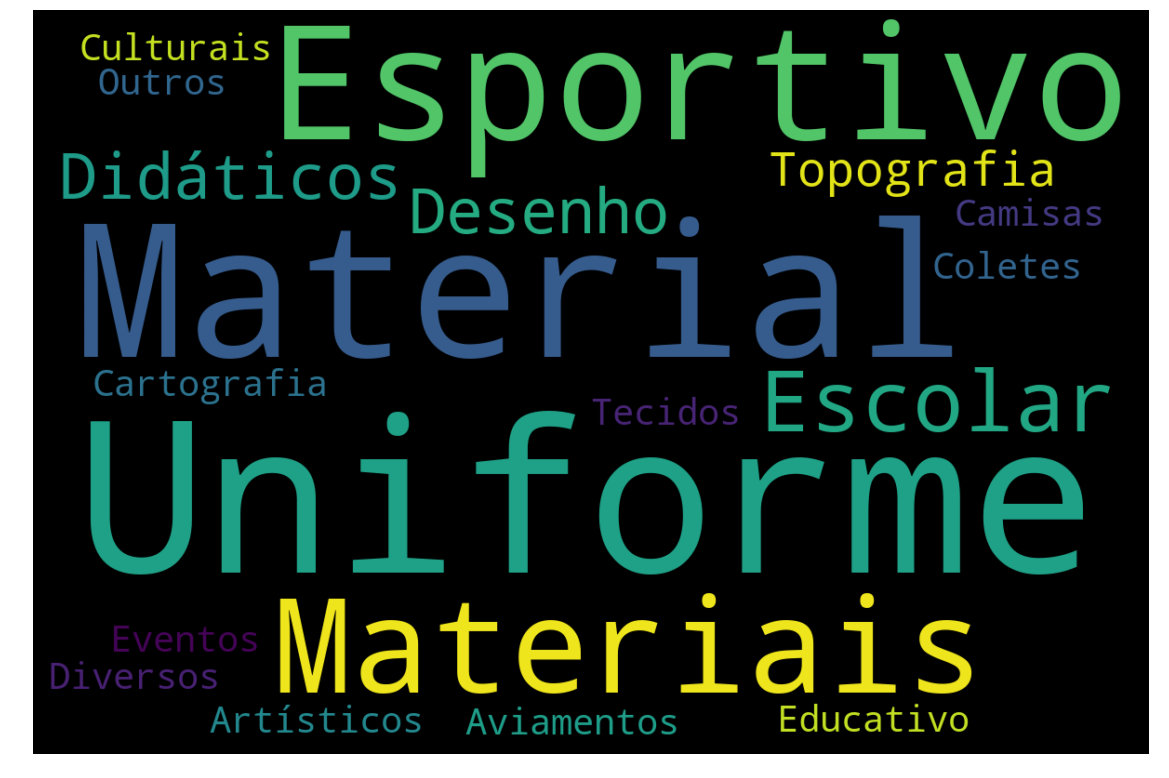

In [119]:
stopwords = nltk.corpus.stopwords.words('portuguese')

# Create a list of word
# text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
text = ' '.join(uni_mat_df['txtDescricaoItemDespesa'].unique())
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=20,
    stopwords=stopwords
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [61]:
groupSum(uni_mat_df)

,valTotalEmpenhado,valLiquidado
txtCategoriaEconomica,,
Despesas Correntes,354.436693,125.351712


,valTotalEmpenhado,valLiquidado
txtDescricaoElemento,,
"Material, Bem ou Serviço para Distribuição Gratuita",347.700502,122.696111
Material de Consumo,6.631588,2.553690
Outros Serviços de Terceiros -Pessoa Jurídica,0.104603,0.101911


,valTotalEmpenhado,valLiquidado
txtDescricaoFonteRecurso,,
Tesouro Municipal,354.436693,125.351712


,valTotalEmpenhado,valLiquidado
txtDescricaoItemDespesa,,
Uniforme Escolar,299.956901,101.765057
Material Escolar,47.743602,20.931055
Materiais Didáticos,2.476033,2.040071
Material Educativo,3.883992,0.302317
Material Esportivo,0.207774,0.155505
Eventos Esportivos Culturais e Artísticos,0.071757,0.069066
"Uniformes, Camisas, Coletes e Outros",0.032845,0.032845
"Materiais para Desenho, Topografia e Cartografia",0.028355,0.028355
"Diversos Uniformes, Tecidos e Aviamentos",0.025565,0.017573


,valTotalEmpenhado,valLiquidado
txtDescricaoPrograma,,
Melhoria da qualidade e ampliação do acesso à educação,353.654685,124.969294
Modernização e descentralização da gestão e prestação de serviços,0.760960,0.361370
Suporte Administrativo,0.021048,0.021048


,valTotalEmpenhado,valLiquidado
txtDescricaoProjetoAtividade,,
Fornecimento de Uniformes e Material Escolar,343.673963,122.696111
Ações e materiais de apoio Didático-Pedagógico Educacional,9.231558,1.659042
"Capacitação, Formação e Aperfeiçoamento de Servidores",0.760960,0.361370
Ampliação da jornada escolar - Programa Mais Educação,0.477874,0.351802
Operação e Manutenção do Sistema Municipal de Ensino,0.248322,0.240329
Administração da Unidade,0.021048,0.021048
Operação e Manutenção dos Centros Educacionais Unificados,0.014973,0.014014
"Eventos Educacionais, Culturais e Esportivos nos Centros Educacionais",0.007995,0.007995


,valTotalEmpenhado,valLiquidado
txtDescricaoSubElemento,,
Outros Materiais de Distribuição Gratuita,299.956901,101.765057
Material Educacional e Cultural,47.743602,20.931055
Outros Materiais de Consumo,2.504388,2.068426
Material Educativo e Esportivo,4.091766,0.457822
"Exposições, Congressos, Conferências e Outros Eventos",0.071757,0.069066
"Confecção de Uniformes, Bandeiras e Flâmulas",0.032845,0.032845
"Uniformes, Tecidos e Aviamentos",0.035434,0.027442


,valTotalEmpenhado,valLiquidado
txtDescricaoSubFuncao,,
Educação Básica,343.937258,122.950455
Administração Geral,9.738475,2.039888
Formação de Recursos Humanos,0.760960,0.361370


,valTotalEmpenhado,valLiquidado
txtDescricaoUnidade,,
Gabinete do Secretário,354.060088,124.999618
Diretoria Regional de Educação - Penha,0.140137,0.137137
Diretoria Regional de Educação - Campo Limpo,0.050250,0.050250
Diretoria Regional de Educação - Ipiranga,0.040352,0.032360
Diretoria Regional de Educação - Guaianases,0.025910,0.025910
Diretoria Regional de Educação - Jaçanã/Tremembé,0.031127,0.025541
Diretoria Regional de Educação Capela do Socorro,0.020371,0.020371
Diretoria Regional de Educação - Itaquera,0.027548,0.019616
Diretoria Regional de Educação - Santo Amaro,0.016175,0.016175


,valTotalEmpenhado,valLiquidado
txtGrupoDespesa,,
Outras Despesas Correntes,354.436693,125.351712


,valTotalEmpenhado,valLiquidado
txtModalidadeAplicacao,,
Aplicações Diretas,354.436693,125.351712


,valTotalEmpenhado,valLiquidado
txtRazaoSocial,,
EBN COMERCIO IMPORTACAO E EXPORTACAO S/A,107.089565,36.572437
BRINK MOBIL EQUIPAMENTOS EDUCACIONAIS LTDA,66.958155,32.852108
NILCATEX TEXTIL LTDA,94.554172,24.173376
R.R.INDUSTRIA E COMERCIO DE MALHAS LTDA,19.607706,9.709875
LT GLOBAL COMERCIO E SERVIÇOS EIRELI - ME,18.161577,6.253990
ATAKA BRASIL COMERCIO E SERVIÇOS EIRELI,9.892844,4.948793
LOTUS COMERCIO LTDA - ME,16.330650,4.312548
GRAFICA PRINT INDUSTRIA E EDITORA LTDA,2.194847,1.795257
BRASILSUL INDUSTRIA E COMERCIO LTDA - EPP,3.799922,1.240188


## Pessoal

In [25]:
np.sort(empenhos_df.txtGrupoDespesa.unique())

array(['Investimentos', 'Outras Despesas Correntes',
       'Pessoal e Encargos Sociais'], dtype=object)

In [36]:
(empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
.txtDescricaoItemDespesa.unique())

array(['Auxílio-Transporte - RPPS', 'Auxílio-Refeição - RPPS',
       'Vale-Alimentação - RPPS', 'RPPS - PMSP', 'PMSP',
       'Outras Despesas Fixas - Pessoal Civil'], dtype=object)

In [18]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('remun', case=False))
]
.txtGrupoDespesa.unique())

array(['Pessoal e Encargos Sociais'], dtype=object)

In [31]:
(empenhos_df[
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
 .groupby('txtDescricaoProjetoAtividade')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values('valLiquidado', ascending=False)
)

,valTotalEmpenhado,valLiquidado
txtDescricaoProjetoAtividade,,
Remuneração dos Profissionais do Magistério,4440.279767,3827.119838
Operação e Manutenção do Sistema Municipal de Ensino,2207.218664,1477.177381
Administração da Unidade,407.105017,326.869262
Operação e Manutenção dos Centros Educacionais Unificados,99.911863,80.761844
Ações Complementares do Sistema Municipal de Ensino,70.318400,56.139625
Programa Nacional de Inclusão de Jovens - PROJOVEM Urbano,2.862376,2.179419


In [37]:
(empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
 .groupby('txtDescricaoProjetoAtividade')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values('valLiquidado', ascending=False)
)

,valTotalEmpenhado,valLiquidado
txtDescricaoProjetoAtividade,,
Remuneração dos Profissionais do Magistério,4440.279767,3827.119838
Operação e Manutenção do Sistema Municipal de Ensino,2632.078365,1897.763038
Administração da Unidade,423.332971,343.097216
Operação e Manutenção dos Centros Educacionais Unificados,105.723527,86.573509
Ações Complementares do Sistema Municipal de Ensino,74.744206,60.565431
Programa Nacional de Inclusão de Jovens - PROJOVEM Urbano,2.862376,2.179419


In [34]:
(empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
 .groupby('txtDescricaoItemDespesa')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values('valLiquidado', ascending=False)
)

,valTotalEmpenhado,valLiquidado
txtDescricaoItemDespesa,,
RPPS - PMSP,7224.500741,5768.052052
Auxílio-Refeição - RPPS,231.914947,231.900788
Vale-Alimentação - RPPS,201.652925,197.393040
Auxílio-Transporte - RPPS,17.757254,17.757254
Outras Despesas Fixas - Pessoal Civil,2.862376,2.179419
PMSP,0.332970,0.015898


In [38]:
(empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
 .groupby(['txtDescricaoItemDespesa', 'txtDescricaoFonteRecurso', 'txtDescricaoProjetoAtividade'])['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values('valLiquidado', ascending=False)
)

valTotalEmpenhado  \
txtDescricaoItemDespesa               txtDescricaoFonteRecurso         txtDescricaoProjetoAtividade                                            
RPPS - PMSP                           Fundo Constitucional da Educação Remuneração dos Profissionais do Magistério               4440.279767   
                                      Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...        2207.218664   
                                                                       Administração da Unidade                                   406.772047   
Auxílio-Refeição - RPPS               Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...         218.186420   
Vale-Alimentação - RPPS               Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...         189.967257   
RPPS - PMSP                           Tesouro Municipal                Operação e Manutenção dos Centros Educacionais ...          99.911863   
                                                                       Ações Complementares do Sistema Municipal de En...          70.318400   
Auxílio-Transporte - RPPS             Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...          16.706024   
Auxílio-Refeição - RPPS               Tesouro Municipal                Administração da Unidade                                     8.417999   
Vale-Alimentação - RPPS               Tesouro Municipal                Administração da Unidade                                     7.165367   
Auxílio-Refeição - RPPS               Tesouro Municipal                Operação e Manutenção dos Centros Educacionais ...           3.014710   
Vale-Alimentação - RPPS               Tesouro Municipal                Operação e Manutenção dos Centros Educacionais ...           2.566110   
Auxílio-Refeição - RPPS               Tesouro Municipal                Ações Complementares do Sistema Municipal de En...           2.295818   
Outras Despesas Fixas - Pessoal Civil Transferências Federais          Programa Nacional de Inclusão de Jovens - PROJO...           2.551884   
Vale-Alimentação - RPPS               Tesouro Municipal                Ações Complementares do Sistema Municipal de En...           1.954191   
Auxílio-Transporte - RPPS             Tesouro Municipal                Administração da Unidade                                     0.644588   
                                                                       Operação e Manutenção dos Centros Educacionais ...           0.230844   
                                                                       Ações Complementares do Sistema Municipal de En...           0.175797   
Outras Despesas Fixas - Pessoal Civil Tesouro Municipal                Programa Nacional de Inclusão de Jovens - PROJO...           0.310493   
PMSP                                  Tesouro Municipal                Administração da Unidade                                     0.332970   

                                                                                                                           valLiquidado  
txtDescricaoItemDespesa               txtDescricaoFonteRecurso         txtDescricaoProjetoAtividade                                      
RPPS - PMSP                           Fundo Constitucional da Educação Remuneração dos Profissionais do Magistério          3827.119838  
                                      Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...   1477.177381  
                                                                       Administração da Unidade                              326.853364  
Auxílio-Refeição - RPPS               Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...    218.172262  
Vale-Alimentação - RPPS               Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...    1

In [39]:
(empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
 .groupby('txtDescricaoSubElemento')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values('valLiquidado', ascending=False)
)

,valTotalEmpenhado,valLiquidado
txtDescricaoSubElemento,,
Vencimentos e Salários,7224.500741,5768.052052
Indenização Auxílio-Refeição,433.567871,429.293828
Indenização Auxílio-Transporte,17.757254,17.757254
Outras Despesas Fixas - Pessoal Civil,2.862376,2.179419
Pessoal Requisitado de Outros Órgãos,0.332970,0.015898


In [43]:
pessoal = (empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
])
groupSum(pessoal)

,valTotalEmpenhado,valLiquidado
txtCategoriaEconomica,,
Despesas Correntes,7679.021212,6217.298451


,valTotalEmpenhado,valLiquidado
txtDescricaoElemento,,
Vencimentos e Vantagens Fixas - Pessoal Civil,7227.363117,5770.231471
Auxílio-Alimentação,433.567871,429.293828
Auxílio-Transporte,17.757254,17.757254
Ressarcimento de Despesas de Pessoal Requisitado,0.332970,0.015898


,valTotalEmpenhado,valLiquidado
txtDescricaoFonteRecurso,,
Fundo Constitucional da Educação,4440.279767,3827.119838
Tesouro Municipal,3236.189562,2388.158422
Transferências Federais,2.551884,2.020191


,valTotalEmpenhado,valLiquidado
txtDescricaoItemDespesa,,
RPPS - PMSP,7224.500741,5768.052052
Auxílio-Refeição - RPPS,231.914947,231.900788
Vale-Alimentação - RPPS,201.652925,197.393040
Auxílio-Transporte - RPPS,17.757254,17.757254
Outras Despesas Fixas - Pessoal Civil,2.862376,2.179419
PMSP,0.332970,0.015898


,valTotalEmpenhado,valLiquidado
txtDescricaoPrograma,,
Melhoria da qualidade e ampliação do acesso à educação,7255.688241,5874.201234
Suporte Administrativo,423.332971,343.097216


,valTotalEmpenhado,valLiquidado
txtDescricaoProjetoAtividade,,
Remuneração dos Profissionais do Magistério,4440.279767,3827.119838
Operação e Manutenção do Sistema Municipal de Ensino,2632.078365,1897.763038
Administração da Unidade,423.332971,343.097216
Operação e Manutenção dos Centros Educacionais Unificados,105.723527,86.573509
Ações Complementares do Sistema Municipal de Ensino,74.744206,60.565431
Programa Nacional de Inclusão de Jovens - PROJOVEM Urbano,2.862376,2.179419


,valTotalEmpenhado,valLiquidado
txtDescricaoSubElemento,,
Vencimentos e Salários,7224.500741,5768.052052
Indenização Auxílio-Refeição,433.567871,429.293828
Indenização Auxílio-Transporte,17.757254,17.757254
Outras Despesas Fixas - Pessoal Civil,2.862376,2.179419
Pessoal Requisitado de Outros Órgãos,0.332970,0.015898


,valTotalEmpenhado,valLiquidado
txtDescricaoSubFuncao,,
Educação Básica,7252.825865,5872.021815
Administração Geral,423.332971,343.097216
Educação de Jovens e Adultos,2.862376,2.179419


,valTotalEmpenhado,valLiquidado
txtDescricaoUnidade,,
Gabinete do Secretário,7679.021212,6217.298451


,valTotalEmpenhado,valLiquidado
txtGrupoDespesa,,
Pessoal e Encargos Sociais,7227.696087,5770.247369
Outras Despesas Correntes,451.325125,447.051082


,valTotalEmpenhado,valLiquidado
txtModalidadeAplicacao,,
Aplicações Diretas,7679.021212,6217.298451


,valTotalEmpenhado,valLiquidado
txtRazaoSocial,,
FOLHA DE PAGAMENTO _ EXECUTIVO,7224.500741,5768.052052
SERV.SEC.MUN. DE EDUCAÇÃO - AUX. REFEIÇÃO,433.567871,429.293828
SERVIDORES DA SECRETARIA MUNICIPAL DE EDUCAÇÃO - AUX. TRANSPORTE,17.757254,17.757254
CARLOS AUGUSTO DE OLIVEIRA GONÇALVES,0.026935,0.026935
ROSELICE APARECIDA CARDOSO SANTOS,0.026918,0.026918
LUCIENE SOARES MARCOLINO,0.026935,0.026831
SANDRA MARIA AMANCIO DUARTE,0.026779,0.026779
ANDREA REGINA DE CARVALHO CASANOVA,0.026733,0.026733
OLAVIO DE OLIVEIRA CONCEIÇÃO,0.026935,0.026727


### Número de servidores

In [12]:
serv_df = pd.read_csv('dados/perfilservidor2016final2.csv', sep='|', encoding='latin-1')
serv_df

/home/bpl/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CD_SERV_SME,MES_NASC,ANO_NASC,IDADE,CD_SEXO,CD_MUNICIPIO_NASC,DC_MUNICIPIO_NASC,UF_MUNICIPIO_NASC,CD_PAIS_NASC,DC_PAIS_NASC,...,SIGLA_ATUAL,CD_UNIDADE_FUNCAO,CD_FUNCAO,DC_FUNCAO,DT_INICIO_FUNCAO,CD_UNIDADE_SOBREPOSTO,CD_SOBREPOSTO,DC_SOBREPOSTO,DT_INICIO_SOBREPOSTO,DATA_BASE
0,147682,7,1949,67,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,IP,0,0,0,0,0,0,0,0,dez/16
1,118214,3,1950,66,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,IP,0,0,0,0,0,0,0,0,dez/16
2,124178,1,1946,70,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,IP,0,0,0,0,0,0,0,0,dez/16
3,217841,6,1948,68,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,PE,0,0,0,0,0,0,0,0,dez/16
4,141541,12,1947,69,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,PE,0,0,0,0,0,0,0,0,dez/16
5,103173,11,1950,66,M,3550308.0,SAO PAULO,SP,10,BRASIL,...,FB,0,0,0,0,0,0,0,0,dez/16
6,267671,12,1946,70,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,IP,0,0,0,0,0,0,0,0,dez/16
7,167152,4,1952,64,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,GA,0,0,0,0,110027,2640,ASSISTENTE TECNICO DE EDUCACAO I,0,dez/16
8,106253,2,1950,66,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,GA,0,0,0,0,110027,2640,ASSISTENTE TECNICO DE EDUCACAO I,23/12/2008,dez/16
9,153522,10,1951,65,F,3550308.0,SAO PAULO,SP,10,BRASIL,...,BT,0,0,0,0,0,0,0,0,dez/16


In [14]:
prof = serv_df[serv_df['DC_CARGO_BASE'].str.contains("PROF.")]
len(prof)

63438

In [15]:
len(serv_df)

83305

In [16]:
len(prof)/len(serv_df)

0.7615149150711242

In [22]:
10200-6200-1958-643-195-123-48
#total-pessoal-convenios-alimentacao-teg-material-infantil (ver se não há duplicados)

1033

In [25]:
(1958/10200)

0.19196078431372549

# TI

In [26]:
ti = (empenhos_df[
    (empenhos_df['txtDescricaoSubFuncao'].str.contains('tecnologia da inf', case=False))
])
groupSum(ti)

,valTotalEmpenhado,valLiquidado
txtCategoriaEconomica,,
Despesas Correntes,66.708423,40.613301
Despesas de Capital,41.379460,0.284038


,valTotalEmpenhado,valLiquidado
txtDescricaoElemento,,
Outros Serviços de Terceiros -Pessoa Jurídica,66.705633,40.610511
Outros Serviços de Terceiros - Pessoa Jurídica,0.360000,0.180000
Equipamentos e Material Permanente,41.019460,0.104038
Material de Consumo,0.002790,0.002790


,valTotalEmpenhado,valLiquidado
txtDescricaoFonteRecurso,,
Tesouro Municipal,108.087883,40.89734


,valTotalEmpenhado,valLiquidado
txtDescricaoItemDespesa,,
"Serviço de Instalação, Ampliação de Sist. de Telefonia/Teleinformática",15.368131,11.271799
PRODAM,15.912125,9.824414
"Outros Serviços de Apoio Administrativo, Técnico e Operacional",9.316095,6.581965
Manutenção e Conservação de Equipamentos de Processamento de Dados,9.195115,5.937811
Manutenção de Software,8.605008,3.876742
"Supervisão, Acompanhamento e Suporte de Serviços Técnicos",2.559587,1.771597
Equipamentos de Processamento de Dados,0.583397,0.522691
Outras Máquinas e Equipamentos,0.552979,0.460816
Guarda e Gerenciamento de Documentos,4.603634,0.361129


,valTotalEmpenhado,valLiquidado
txtDescricaoPrograma,,
Modernização e descentralização da gestão e prestação de serviços,108.087883,40.89734


,valTotalEmpenhado,valLiquidado
txtDescricaoProjetoAtividade,,
"Aquisição de Materiais, Equipamentos e Serviços de Informação e Comuni",92.175758,31.072926
Manutenção de Sistemas de Informação e Comunicação,15.912125,9.824414


,valTotalEmpenhado,valLiquidado
txtDescricaoSubElemento,,
Serviços de Telecomunicações,15.368131,11.271799
Serviços Técnicos Profissionais de T.I.,15.912125,9.824414
"Serviço de Apoio Administrativo, Técnico e Operacional",13.919729,6.943094
Manutenção e Conservação de Equipamentos de Processamento de Dados,9.195115,5.937811
Manutenção de Software,8.605008,3.876742
Serviços Técnicos Profissionais,2.567401,1.771597
Manut. e Conserv. de Máquinas e Equipamentos,1.136377,0.983508
Aquisição de Softwares de Base ou Aplicação,0.360000,0.180000
Máquinas e Equipamentos Energéticos,0.075294,0.070812


,valTotalEmpenhado,valLiquidado
txtDescricaoSubFuncao,,
Tecnologia da Informação,108.087883,40.89734


,valTotalEmpenhado,valLiquidado
txtDescricaoUnidade,,
Gabinete do Secretário,108.087883,40.89734


,valTotalEmpenhado,valLiquidado
txtGrupoDespesa,,
Outras Despesas Correntes,66.708423,40.613301
Investimentos,41.379460,0.284038


,valTotalEmpenhado,valLiquidado
txtModalidadeAplicacao,,
Aplicações Diretas,108.087883,40.89734


,valTotalEmpenhado,valLiquidado
txtRazaoSocial,,
PRIMESYS SOLUÇÕES EMPRESARIAIS S.A.,14.698120,10.708426
EMPRESA DE TECNOLOGIA DA INFORMAÇÃO E COMUNICAÇÃO DO MUNICÍPIO DE SÃO PAULO - PRODAM-SP S/A,15.912125,9.824414
GOLDEN DISTRIBUIDORA LTDA.,9.334915,6.538447
G&P PROJETOS E SISTEMAS LTDA,9.320045,5.895701
MSTECH EDUCACAO E TECNOLOGIA EIRELI,7.853286,3.335047
AYNIL SOLUÇÕES S/A,2.634882,1.842409
TELEFÔNICA BRASIL S.A.,0.670011,0.563374
ACECO TI S.A.,0.583397,0.522691
GARTNER DO BRASIL SERVIÇOS DE PESQUISAS LTDA.,0.534159,0.504334
